DIVA

In [1]:
%matplotlib inline
import os
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

In [2]:
from SensorimotorExploration.DataManager.SimulationData import load_sim_h5_v2 as load_sim_h5
from SensorimotorExploration.DataManager.PlotTools import *

def incremental_mean(arr_):
    n_samples = len(arr_)
    sum_ = 0
    out = []
    for i in range(n_samples):
        sum_ += arr_[i]
        out += [sum_/(i + 1.)]
    out = np.array(out).flatten()
    return out

def moving_av(arr_, win_sz):
    n_samples = len(arr_)
    sum_ = 0
    out = []
    for i in range(win_sz):
        sum_ += arr_[i]
        out += [sum_/(i + 1.)]
    for i in range(win_sz,n_samples):
        sum_ = sum_ + arr_[i] - arr_[i-win_sz]
        out += [sum_/win_sz]
    out = np.array(out).flatten()
    return out

In [14]:
data_file = "experiment_1/Vowels_Tree_8_2017_03_28_07_48_sim_data.h5"


conf_file =  data_file.replace('sim_data.h5', 'conf.txt')
conf = {}
with open(conf_file) as f:
    for line in f:
        line = line.replace('\n', '')
        (key, val) = line.split(': ')
        conf[key] = val

#Sensor evaluation data
eva_sensor_data, foo = load_sim_h5(data_file.replace('sim_data.h5', 'eva_valset.h5'))

sensor = eva_sensor_data.sensor.data.as_matrix()
sensor_goal = eva_sensor_data.sensor_goal.data.as_matrix()

sensor_eva_error_ = np.linalg.norm(sensor_goal - sensor, axis=1)

sensor_eva_contact_ = eva_sensor_data.cons.data.as_matrix()

sim_eva_errors = []

with open(data_file.replace('sim_data.h5', 'eval_error.txt'), 'r') as f:
    for line in f:
        line.replace('\n','')
        eva_errors_str = line.split(': ')
        sim_eva_errors += [float(eva_errors_str[1])] 
        
sim_eva_errors = np.array(sim_eva_errors)

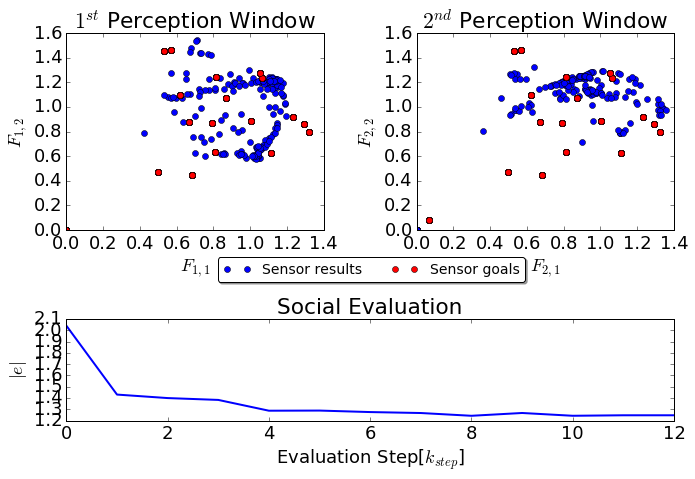

In [15]:
matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams.update({'figure.autolayout': True})
##FIG 1

fig = plt.figure()
ax = plt.subplot(10,2,1)

#plt.sca(ax1)
ax1 = plt.subplot2grid((10,2),(0,0),rowspan=6)
ax2 = plt.subplot2grid((10,2),(0,1),rowspan=6)
ax3 = plt.subplot2grid((10,2),(6,0),rowspan=4,colspan=2)

ax1.set_title('$1^{st}$ Perception Window')
eva_sensor_data.plot_2D('sensor',0,'sensor',1,color='ob',axes=ax1)
eva_sensor_data.plot_2D('sensor_goal',0,'sensor_goal',1,color='or',axes=ax1)
plt.xlabel('$F_{1,1}$')
plt.ylabel('$F_{1,2}$')
lgd = plt.legend(['Sensor results', 'Sensor goals'],\
            ncol=2,loc='lower right',fontsize=14, bbox_to_anchor=(1.81, -0.3),
          fancybox=True, shadow=True)
#plt.tight_layout()


#lt.sca(ax2)
ax2.set_title('$2^{nd}$ Perception Window')
eva_sensor_data.plot_2D('sensor',3,'sensor',4,color='ob',axes=ax2)
eva_sensor_data.plot_2D('sensor_goal',3,'sensor_goal',4,color='or',axes=ax2)
plt.xlabel('$F_{2,1}$')
plt.ylabel('$F_{2,2}$')
#plt.tight_layout()

plt.sca(ax3)
ax3.set_title('Social Evaluation')
plt.plot(sim_eva_errors, lw=2.)
plt.xlabel('Evaluation Step[$k_{step}$]')
plt.ylabel('$|e|$')
#plt.tight_layout()

In [16]:
fig.savefig('/home/yumilceh/Desktop/eval_plots_diva.eps',\
              format='eps', dpi=1000,bbox_extra_artists=(lgd,), bbox_inches='tight')
# fig1.savefig(directory + 'vt_results.eps',\
#              format='eps', dpi=1000,bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
np.sum(data.competence.data)/20000

In [ ]:
incremental_mean(data.cons.data.as_matrix())